In [1]:
## Import Required Libraries
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('D:\\Tutedude\\Assignment 8 - RAINFALL PREDICTION PROJECT\\austin_weather.csv')
data.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
#Drop the unnecessary columns
data = data.drop(['Events', "Date", "SeaLevelPressureLowInches"], axis=1)

In [5]:
data = data.replace('T', 0.0)

In [6]:
data = data.replace('-', 0.0)

In [7]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [8]:
data.to_csv("D:\\Tutedude\\DS-Assignments\\Assignment 8 - RAINFALL PREDICTION PROJECT\\austin_weather_final.csv")

In [10]:
#Importing Libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("D:\\Tutedude\\DS-Assignments\\Assignment 8 - RAINFALL PREDICTION PROJECT\\austin_weather_final.csv")
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1315,1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1316,1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1317,1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [13]:
X = data.drop(['PrecipitationSumInches'], axis=1)

In [14]:
Y = data['PrecipitationSumInches']

In [15]:
#reshaping it in 2d vector
Y = Y.values.reshape(-1, 1)

In [16]:
Y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [18]:
day_index = 798
days = [i for i in range(Y.size)]
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [19]:
#Initialize the linear regression classifier
clf = LinearRegression()

#train the classifier
clf.fit(X, Y)


LinearRegression()

The percipitation trend graph:


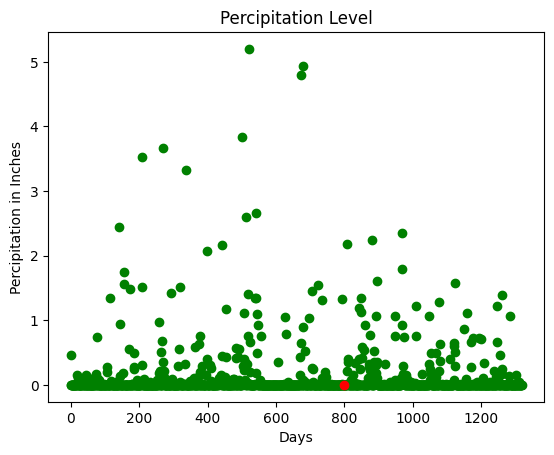

In [40]:
#Plot a graph
print("The percipitation trend graph:")
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Percipitation Level")
plt.xlabel("Days")
plt.ylabel("Percipitation in Inches")
plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'])

In [41]:
print("The precipitation vs attributes trend graph")

for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color='r')
    plt.title(x_vis.columns.values[i])
plt.show()

The precipitation vs attributes trend graph


TypeError: 'Axes' object is not callable

The precipitation vs attributes trend graph:


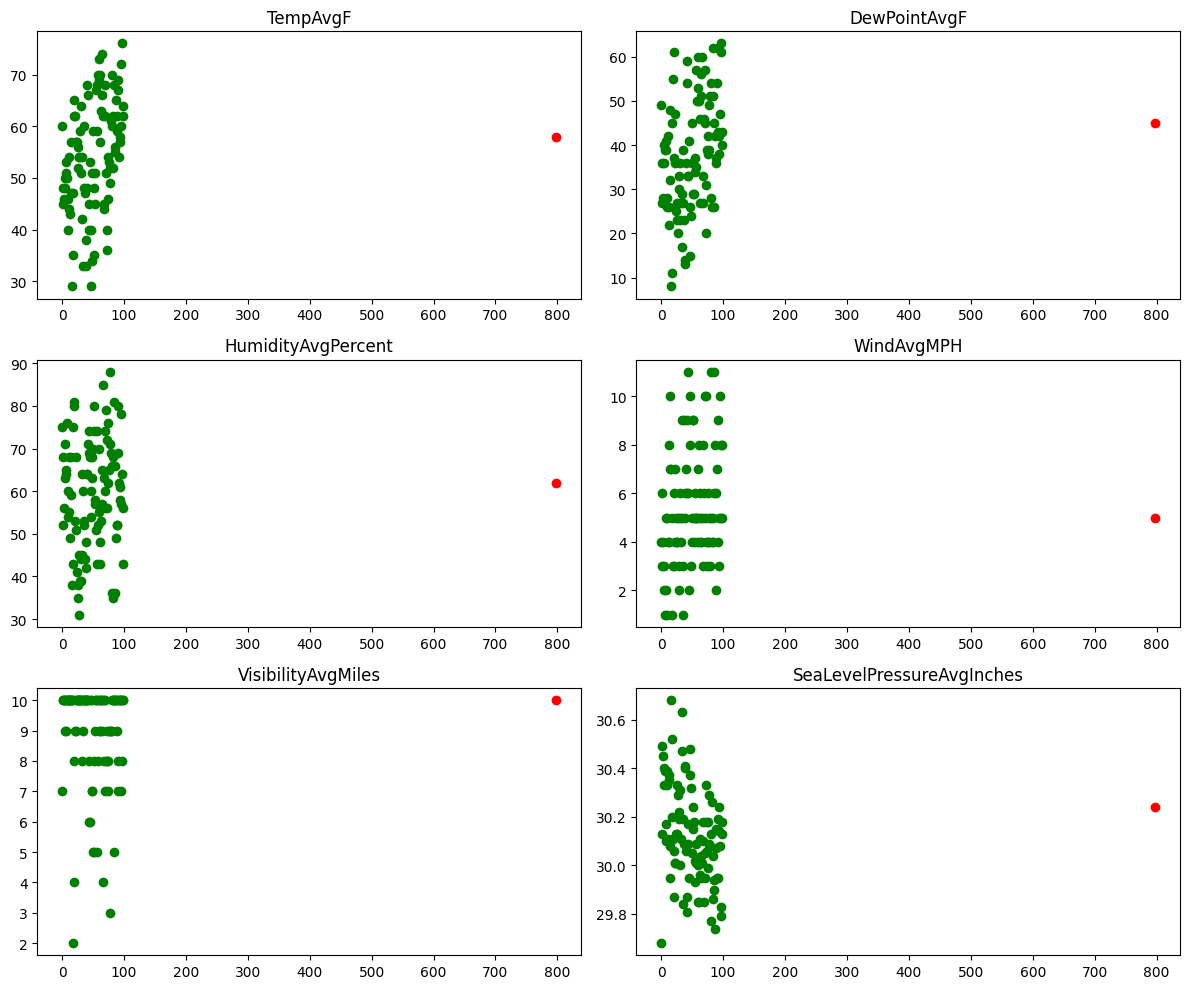

In [34]:
print("The precipitation vs attributes trend graph:")

fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # Create multiple subplots
axes = axes.flatten()  # Flatten the 2D array into 1D for easier indexing

for i in range(x_vis.columns.size):
    axes[i].scatter(days[:100], x_vis.iloc[:100, i], color='g')
    axes[i].scatter(days[day_index], x_vis.iloc[day_index, i], color='r')
    axes[i].set_title(x_vis.columns[i])

plt.tight_layout()
plt.show()

The precipitation trend graph:


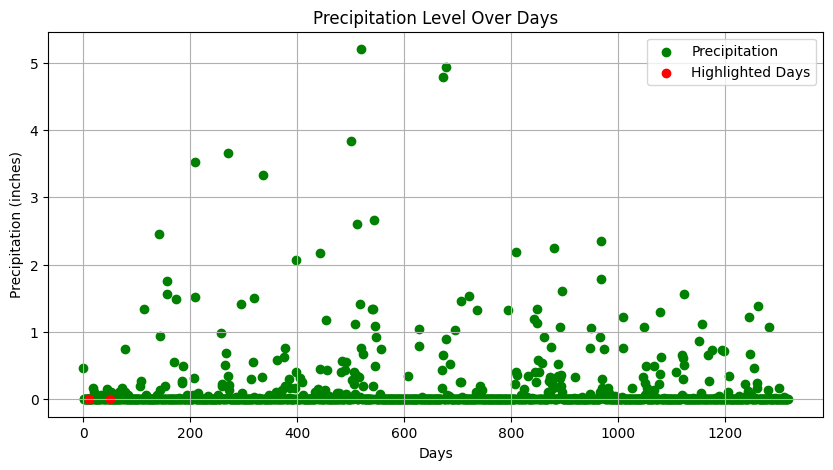

The precipitation vs attributes trend graph:


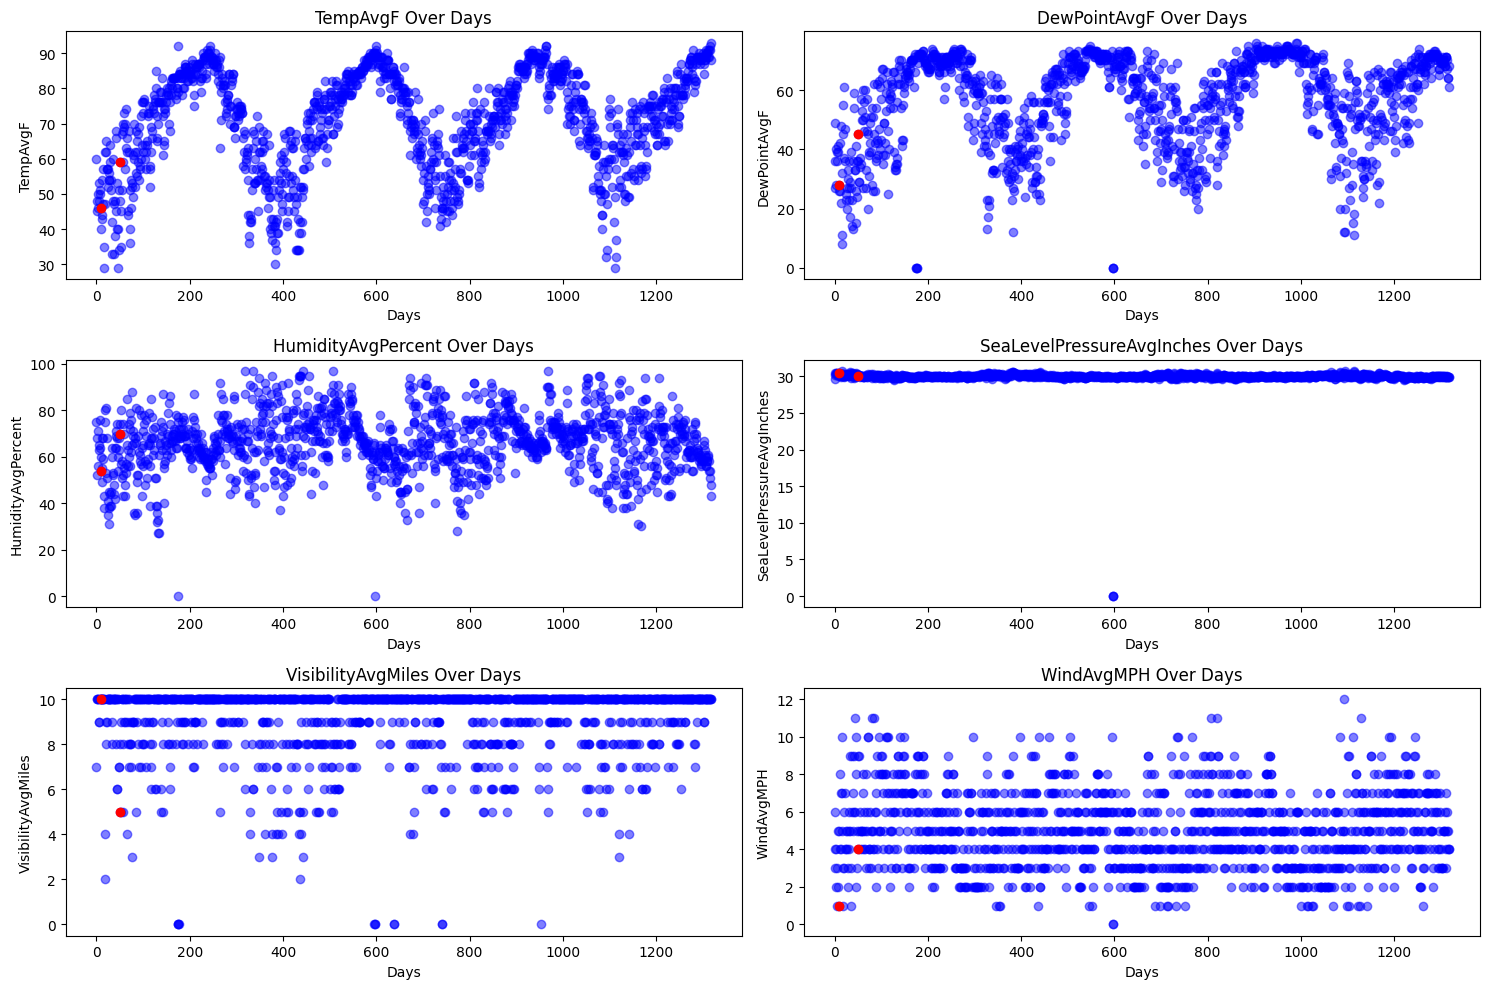

In [46]:
# 1️⃣ Precipitation Trend Over Days
print("The precipitation trend graph:")
plt.figure(figsize=(10, 5))
plt.scatter(days, Y, color='green', label='Precipitation')
plt.scatter(day_index, [Y[i][0] for i in day_index], color='red', label='Highlighted Days')
plt.title("Precipitation Level Over Days")
plt.xlabel("Days")
plt.ylabel("Precipitation (inches)")
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ Precipitation vs Weather Attributes
print("The precipitation vs attributes trend graph:")
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(x_vis.columns):
    axes[i].scatter(days, x_vis[col], color='blue', alpha=0.5)
    axes[i].scatter(day_index, [x_vis[col].iloc[j] for j in day_index], color='red')
    axes[i].set_title(f"{col} Over Days")
    axes[i].set_xlabel("Days")
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()
